## Transports of water along several cross-sections when diffusivity changes

Transports across several cross sections in the domain (See plot further down)

Water transport calculated as $\Phi_w = \vec{u}\cdot\vec{a}$

Advective tracer transport $\Phi_{Tadv}=C\vec{u}\cdot\vec{a}$ from model output diagnostics.

Diffusive tracer transport $\Phi_{Tdiff}$ from model output (Includes diffusion due to advection scheme)

Frequency of output is 43200 s (half a day) and the size of the fields is 360x360x90x20.


For passive tracers units correspond to what I entered as units in data.ptracers but it really doesn't matter.

Filename: FluxTR01 

| Variable    |   Units                        | Description  | Coordinates           | Size                      |
|------------ | :----------------------------: |:-------------|:---------------------:|:--------------------------:
| UTRAC01     |  $Mol\ l^{-1}\cdot ms^{-1}$    |Zonal Mass-Weighted Transp of Tr01   | (T, Z, Y, Xp1) | (18,90,360,361)
| VTRAC01     |  $Mol\ l^{-1}\cdot ms^{-1}$    |Meridional Mass-Weighted Transp of Tr01|(T, Z, Yp1, X) | (18,90,361,360)
| WTRAC01     |  $Mol\ l^{-1}\cdot ms^{-1}$    |Vertical Mass-Weighted Transp of Tr01|(T, Z, Y, X) | (18,90,360,360)
| ADVrTr01    |  $Mol\ l^{-1}\cdot m^3s^{-1}$  |Vertical Advective Flux of Tr01|(T, Z, Y, X) | (18,90,360,360)
| ADVxTr01    |  $Mol\ l^{-1}\cdot m^3s^{-1}$  |Zonal Advective Flux of Tr01 |(T, Z, Y, Xp1) | (18,90,360,361)
| ADVyTr01    |  $Mol\ l^{-1}\cdot m^3s^{-1}$  |Meridional Advective Flux of Tr01|(T, Z, Yp1, X) | (18,90,361,360)
| DFrETr01    |  $Mol\ l^{-1}\cdot m^3s^{-1}$  |Vertical Diffusive Flux of Tr01 (Explicit part)|(T, Z, Y, X)| (18,90,360,360)
| DFxETr01    |  $Mol\ l^{-1}\cdot m^3s^{-1}$  | Zonal      Diffusive Flux of Tr01|(T, Z, Y, Xp1) | (18,90,360,361)
| DFyETr01    |  $Mol\ l^{-1}\cdot m^3s^{-1}$  | Meridional Diffusive Flux of Tr01|(T, Z, Yp1, X) | (18,90,361,360)
| DFrITr01    |  $Mol\ l^{-1}\cdot m^3s^{-1}$  | Vertical Diffusive Flux of Tr01 (Implicit part)| (T, Z, Y, X) | (18,90,360,360) 
 

In [1]:
import datetime as dtm      # Python's standard date and time library
import dateutil as dutil    # Powerful datetime extensions
import glob
from math import *
from matplotlib.dates import num2date
import matplotlib.pyplot as plt
%matplotlib inline
from netCDF4 import Dataset
import numpy as np
import seaborn as sns
import scipy.io
import xarray as xr

In [2]:
def calc_wat_transport_CS(vel_component, x_slice, y_slice, spacing, dim_name):
    '''
    INPUT:
    vel_component: xarray, Velocity component perpendicular to cross section (e.g. state03.V)
    x_slice : slice or index of cross-section in alongshore direction
    y_slice : slice or index of cross-section in cross-shore direction
    spacing: xarray, width of cross section elements (e.g. dxG, etc)
    dim_name: str, name of the dimension along which to sum.
    
    '''
    vel_CS = (vel_component.isel(Yp1=y_slice, X=x_slice))
    dx_CS = (spacing.isel(Yp1=y_slice, X=x_slice))

    waterCS_flux = (dx_CS*vel_CS).sum(dim=dim_name)

    return waterCS_flux

def calc_wat_transport_AS(vel_component, x_slice, y_slice, spacing, dim_name):
    '''
    INPUT:
    vel_component: xarray, Velocity component perpendicular to cross section (e.g. state03.V)
    x_slice : slice or index of cross-section in alongshore direction
    y_slice : slice or index of cross-section in cross-shore direction
    spacing: xarray, width of cross section elements (e.g. dxG, etc)
    dim_name: str, name of the dimension along which to sum.
    
    '''
    vel_AS = (vel_component.isel(Y=y_slice, Xp1=x_slice))
    dx_AS = (spacing.isel(Y=y_slice, Xp1=x_slice))

    waterAS_flux = (dx_AS*vel_AS).sum(dim=dim_name)

    return waterAS_flux

In [3]:
grid_file = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/gridGlob.nc'
state_file03 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/stateGlob.nc'
state_file11 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run11/stateGlob.nc'
state_file12 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run12/stateGlob.nc'
state_file17 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run17/stateGlob.nc'
state_file3D04 = '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run04/stateGlob.nc'
state_file3D05 = '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run05/stateGlob.nc'
state_file3D06 = '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run06/stateGlob.nc'
state_file3D07 = '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run07/stateGlob.nc'

grid = xr.open_dataset(grid_file)
state03 = xr.open_dataset(state_file03)
state11 = xr.open_dataset(state_file11)
state12 = xr.open_dataset(state_file12)
state17 = xr.open_dataset(state_file17)
state3D04 = xr.open_dataset(state_file3D04)
state3D05 = xr.open_dataset(state_file3D05)
state3D06 = xr.open_dataset(state_file3D06)
state3D07 = xr.open_dataset(state_file3D07)


### Cross-sections

In [4]:
CS1_x_slice = slice(0, 59)
CS2_x_slice = slice(60, 119)
CS3_x_slice = slice(120, 239)
CS4_x_slice = slice(240, 299)
CS5_x_slice = slice(300, 359)

CS1_y_ind = 227
CS1b_y_ind = 267
CS1c_y_ind = 297
CS1d_y_ind = 359

AS1_y_slice = slice(227, 266)
AS2_y_slice = slice(267, 298)
AS3_y_slice = slice(269, 359)


AS1_x_ind = 239


In [5]:
waterCS1_flux03 = calc_wat_transport_CS(state03.V, CS1_x_slice, CS1_y_ind, grid.dxG , 'X')
waterCS2_flux03 = calc_wat_transport_CS(state03.V, CS2_x_slice, CS1_y_ind, grid.dxG , 'X')
waterCS3_flux03 = calc_wat_transport_CS(state03.V, CS3_x_slice, CS1_y_ind, grid.dxG , 'X')
waterCS4_flux03 = calc_wat_transport_CS(state03.V, CS4_x_slice, CS1_y_ind, grid.dxG , 'X')
waterCS5_flux03 = calc_wat_transport_CS(state03.V, CS5_x_slice, CS1_y_ind, grid.dxG , 'X')

waterCS1_flux11 = calc_wat_transport_CS(state11.V, CS1_x_slice, CS1_y_ind, grid.dxG , 'X')
waterCS2_flux11 = calc_wat_transport_CS(state11.V, CS2_x_slice, CS1_y_ind, grid.dxG , 'X')
waterCS3_flux11 = calc_wat_transport_CS(state11.V, CS3_x_slice, CS1_y_ind, grid.dxG , 'X')
waterCS4_flux11 = calc_wat_transport_CS(state11.V, CS4_x_slice, CS1_y_ind, grid.dxG , 'X')
waterCS5_flux11 = calc_wat_transport_CS(state11.V, CS5_x_slice, CS1_y_ind, grid.dxG , 'X')

waterCS1_flux12= calc_wat_transport_CS(state12.V, CS1_x_slice, CS1_y_ind, grid.dxG , 'X')
waterCS2_flux12= calc_wat_transport_CS(state12.V, CS2_x_slice, CS1_y_ind, grid.dxG , 'X')
waterCS3_flux12= calc_wat_transport_CS(state12.V, CS3_x_slice, CS1_y_ind, grid.dxG , 'X')
waterCS4_flux12= calc_wat_transport_CS(state12.V, CS4_x_slice, CS1_y_ind, grid.dxG , 'X')
waterCS5_flux12= calc_wat_transport_CS(state12.V, CS5_x_slice, CS1_y_ind, grid.dxG , 'X')

waterCS1_flux17 = calc_wat_transport_CS(state17.V, CS1_x_slice, CS1_y_ind, grid.dxG , 'X')
waterCS2_flux17 = calc_wat_transport_CS(state17.V, CS2_x_slice, CS1_y_ind, grid.dxG , 'X')
waterCS3_flux17 = calc_wat_transport_CS(state17.V, CS3_x_slice, CS1_y_ind, grid.dxG , 'X')
waterCS4_flux17 = calc_wat_transport_CS(state17.V, CS4_x_slice, CS1_y_ind, grid.dxG , 'X')
waterCS5_flux17 = calc_wat_transport_CS(state17.V, CS5_x_slice, CS1_y_ind, grid.dxG , 'X')

waterCS1_flux3D04 = calc_wat_transport_CS(state3D04.V, CS1_x_slice, CS1_y_ind, grid.dxG , 'X')
waterCS2_flux3D04 = calc_wat_transport_CS(state3D04.V, CS2_x_slice, CS1_y_ind, grid.dxG , 'X')
waterCS3_flux3D04 = calc_wat_transport_CS(state3D04.V, CS3_x_slice, CS1_y_ind, grid.dxG , 'X')
waterCS4_flux3D04 = calc_wat_transport_CS(state3D04.V, CS4_x_slice, CS1_y_ind, grid.dxG , 'X')
waterCS5_flux3D04 = calc_wat_transport_CS(state3D04.V, CS5_x_slice, CS1_y_ind, grid.dxG , 'X')

waterCS1_flux3D05 = calc_wat_transport_CS(state3D05.V, CS1_x_slice, CS1_y_ind, grid.dxG , 'X')
waterCS2_flux3D05 = calc_wat_transport_CS(state3D05.V, CS2_x_slice, CS1_y_ind, grid.dxG , 'X')
waterCS3_flux3D05 = calc_wat_transport_CS(state3D05.V, CS3_x_slice, CS1_y_ind, grid.dxG , 'X')
waterCS4_flux3D05 = calc_wat_transport_CS(state3D05.V, CS4_x_slice, CS1_y_ind, grid.dxG , 'X')
waterCS5_flux3D05 = calc_wat_transport_CS(state3D05.V, CS5_x_slice, CS1_y_ind, grid.dxG , 'X')

waterCS1_flux3D06 = calc_wat_transport_CS(state3D06.V, CS1_x_slice, CS1_y_ind, grid.dxG , 'X')
waterCS2_flux3D06 = calc_wat_transport_CS(state3D06.V, CS2_x_slice, CS1_y_ind, grid.dxG , 'X')
waterCS3_flux3D06 = calc_wat_transport_CS(state3D06.V, CS3_x_slice, CS1_y_ind, grid.dxG , 'X')
waterCS4_flux3D06 = calc_wat_transport_CS(state3D06.V, CS4_x_slice, CS1_y_ind, grid.dxG , 'X')
waterCS5_flux3D06 = calc_wat_transport_CS(state3D06.V, CS5_x_slice, CS1_y_ind, grid.dxG , 'X')

waterCS1_flux3D07 = calc_wat_transport_CS(state3D07.V, CS1_x_slice, CS1_y_ind, grid.dxG , 'X')
waterCS2_flux3D07 = calc_wat_transport_CS(state3D07.V, CS2_x_slice, CS1_y_ind, grid.dxG , 'X')
waterCS3_flux3D07 = calc_wat_transport_CS(state3D07.V, CS3_x_slice, CS1_y_ind, grid.dxG , 'X')
waterCS4_flux3D07 = calc_wat_transport_CS(state3D07.V, CS4_x_slice, CS1_y_ind, grid.dxG , 'X')
waterCS5_flux3D07 = calc_wat_transport_CS(state3D07.V, CS5_x_slice, CS1_y_ind, grid.dxG , 'X')


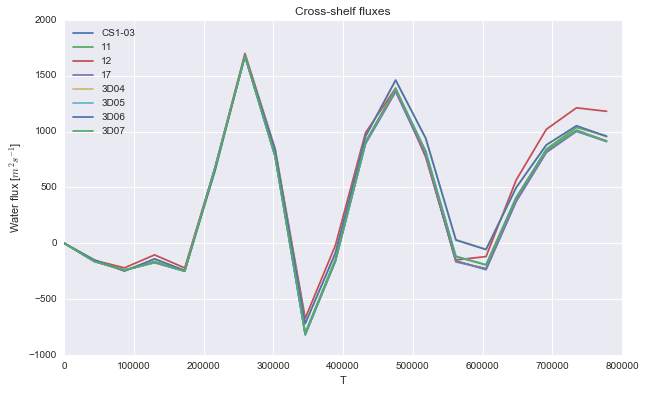

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

waterCS1_flux03.sum(dim='Z').plot(ax=ax, label = 'CS1-03')
waterCS1_flux11.sum(dim='Z').plot(ax=ax, label = '11')
waterCS1_flux12.sum(dim='Z').plot(ax=ax, label = '12')
waterCS1_flux17.sum(dim='Z').plot(ax=ax, label = '17')
waterCS1_flux3D04.sum(dim='Z').plot(ax=ax, label = '3D04') 
waterCS1_flux3D05.sum(dim='Z').plot(ax=ax, label = '3D05') 
waterCS1_flux3D06.sum(dim='Z').plot(ax=ax, label = '3D06') 
waterCS1_flux3D07.sum(dim='Z').plot(ax=ax, label = '3D07') 

ax.set_ylabel('Water flux [$m^2s^{-1}$]')
ax.legend(loc=0)
ax.set_title('Cross-shelf fluxes')

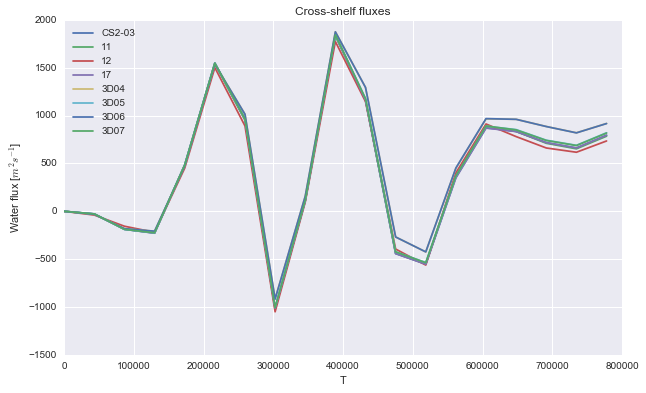

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

waterCS2_flux03.sum(dim='Z').plot(ax=ax, label = 'CS2-03')
waterCS2_flux11.sum(dim='Z').plot(ax=ax, label = '11')
waterCS2_flux12.sum(dim='Z').plot(ax=ax, label = '12')
waterCS2_flux17.sum(dim='Z').plot(ax=ax, label = '17')
waterCS2_flux3D04.sum(dim='Z').plot(ax=ax, label = '3D04') 
waterCS2_flux3D05.sum(dim='Z').plot(ax=ax, label = '3D05') 
waterCS2_flux3D06.sum(dim='Z').plot(ax=ax, label = '3D06') 
waterCS2_flux3D07.sum(dim='Z').plot(ax=ax, label = '3D07') 


ax.set_ylabel('Water flux [$m^2s^{-1}$]')
ax.legend(loc=0)
ax.set_title('Cross-shelf fluxes')


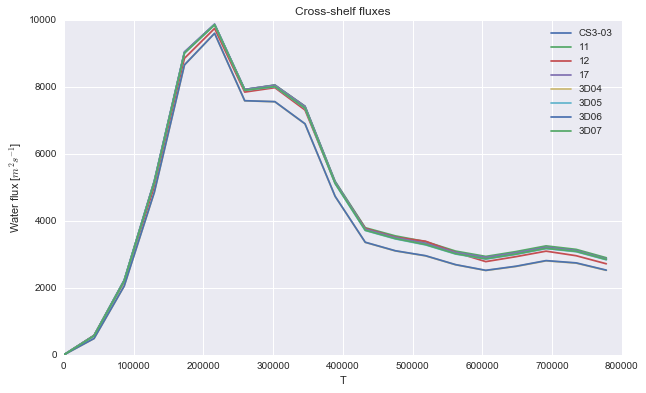

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

waterCS3_flux03.sum(dim='Z').plot(ax=ax, label = 'CS3-03')
waterCS3_flux11.sum(dim='Z').plot(ax=ax, label = '11')
waterCS3_flux12.sum(dim='Z').plot(ax=ax, label = '12')
waterCS3_flux17.sum(dim='Z').plot(ax=ax, label = '17')
waterCS3_flux3D04.sum(dim='Z').plot(ax=ax, label = '3D04') 
waterCS3_flux3D05.sum(dim='Z').plot(ax=ax, label = '3D05') 
waterCS3_flux3D06.sum(dim='Z').plot(ax=ax, label = '3D06') 
waterCS3_flux3D07.sum(dim='Z').plot(ax=ax, label = '3D07') 


ax.set_ylabel('Water flux [$m^2s^{-1}$]')
ax.legend(loc=0)
ax.set_title('Cross-shelf fluxes')


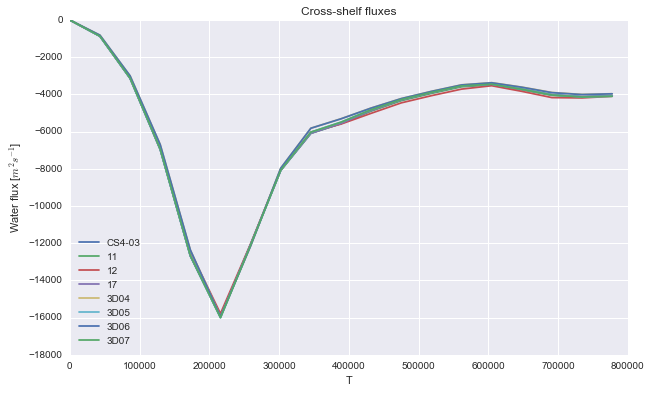

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

waterCS4_flux03.sum(dim='Z').plot(ax=ax, label = 'CS4-03')
waterCS4_flux11.sum(dim='Z').plot(ax=ax, label = '11')
waterCS4_flux12.sum(dim='Z').plot(ax=ax, label = '12')
waterCS4_flux17.sum(dim='Z').plot(ax=ax, label = '17')
waterCS4_flux3D04.sum(dim='Z').plot(ax=ax, label = '3D04') 
waterCS4_flux3D05.sum(dim='Z').plot(ax=ax, label = '3D05') 
waterCS4_flux3D06.sum(dim='Z').plot(ax=ax, label = '3D06') 
waterCS4_flux3D07.sum(dim='Z').plot(ax=ax, label = '3D07') 


ax.set_ylabel('Water flux [$m^2s^{-1}$]')
ax.legend(loc=0)
ax.set_title('Cross-shelf fluxes')


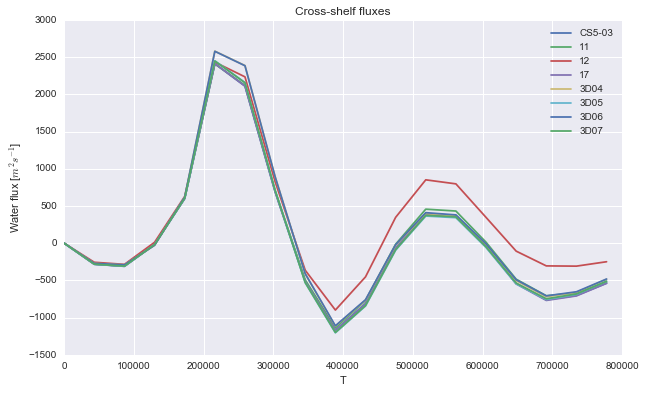

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

waterCS5_flux03.sum(dim='Z').plot(ax=ax, label = 'CS5-03')
waterCS5_flux11.sum(dim='Z').plot(ax=ax, label = '11')
waterCS5_flux12.sum(dim='Z').plot(ax=ax, label = '12')
waterCS5_flux17.sum(dim='Z').plot(ax=ax, label = '17')
waterCS5_flux3D04.sum(dim='Z').plot(ax=ax, label = '3D04') 
waterCS5_flux3D05.sum(dim='Z').plot(ax=ax, label = '3D05') 
waterCS5_flux3D06.sum(dim='Z').plot(ax=ax, label = '3D06') 
waterCS5_flux3D07.sum(dim='Z').plot(ax=ax, label = '3D07') 


ax.set_ylabel('Water flux [$m^2s^{-1}$]')
ax.legend(loc=0)
ax.set_title('Cross-shelf fluxes')


## Alongshore transports

In [12]:
waterAS1_flux03 = calc_wat_transport_AS(state03.U, AS1_x_ind, AS1_y_slice, grid.dyG , 'Y')
waterAS2_flux03 = calc_wat_transport_AS(state03.U, AS1_x_ind, AS2_y_slice, grid.dyG , 'Y')
waterAS3_flux03 = calc_wat_transport_AS(state03.U, AS1_x_ind, AS3_y_slice, grid.dyG , 'Y')

waterAS1_flux11 = calc_wat_transport_AS(state11.U, AS1_x_ind, AS1_y_slice, grid.dyG , 'Y')
waterAS2_flux11 = calc_wat_transport_AS(state11.U, AS1_x_ind, AS2_y_slice, grid.dyG , 'Y')
waterAS3_flux11 = calc_wat_transport_AS(state11.U, AS1_x_ind, AS3_y_slice, grid.dyG , 'Y')

waterAS1_flux12= calc_wat_transport_AS(state12.U, AS1_x_ind, AS1_y_slice, grid.dyG , 'Y')
waterAS2_flux12= calc_wat_transport_AS(state12.U, AS1_x_ind, AS2_y_slice, grid.dyG , 'Y')
waterAS3_flux12= calc_wat_transport_AS(state12.U, AS1_x_ind, AS3_y_slice, grid.dyG , 'Y')

waterAS1_flux17 = calc_wat_transport_AS(state17.U, AS1_x_ind, AS1_y_slice, grid.dyG , 'Y')
waterAS2_flux17 = calc_wat_transport_AS(state17.U, AS1_x_ind, AS2_y_slice, grid.dyG , 'Y')
waterAS3_flux17 = calc_wat_transport_AS(state17.U, AS1_x_ind, AS3_y_slice, grid.dyG , 'Y')

waterAS1_flux3D04 = calc_wat_transport_AS(state3D04.U, AS1_x_ind, AS1_y_slice, grid.dyG , 'Y')
waterAS2_flux3D04 = calc_wat_transport_AS(state3D04.U, AS1_x_ind, AS2_y_slice, grid.dyG , 'Y')
waterAS3_flux3D04 = calc_wat_transport_AS(state3D04.U, AS1_x_ind, AS3_y_slice, grid.dyG , 'Y')

waterAS1_flux3D05 = calc_wat_transport_AS(state3D05.U, AS1_x_ind, AS1_y_slice, grid.dyG , 'Y')
waterAS2_flux3D05 = calc_wat_transport_AS(state3D05.U, AS1_x_ind, AS2_y_slice, grid.dyG , 'Y')
waterAS3_flux3D05 = calc_wat_transport_AS(state3D05.U, AS1_x_ind, AS3_y_slice, grid.dyG , 'Y')

waterAS1_flux3D06 = calc_wat_transport_AS(state3D06.U, AS1_x_ind, AS1_y_slice, grid.dyG , 'Y')
waterAS2_flux3D06 = calc_wat_transport_AS(state3D06.U, AS1_x_ind, AS2_y_slice, grid.dyG , 'Y')
waterAS3_flux3D06 = calc_wat_transport_AS(state3D06.U, AS1_x_ind, AS3_y_slice, grid.dyG , 'Y')

waterAS1_flux3D07 = calc_wat_transport_AS(state3D07.U, AS1_x_ind, AS1_y_slice, grid.dyG , 'Y')
waterAS2_flux3D07 = calc_wat_transport_AS(state3D07.U, AS1_x_ind, AS2_y_slice, grid.dyG , 'Y')
waterAS3_flux3D07 = calc_wat_transport_AS(state3D07.U, AS1_x_ind, AS3_y_slice, grid.dyG , 'Y')



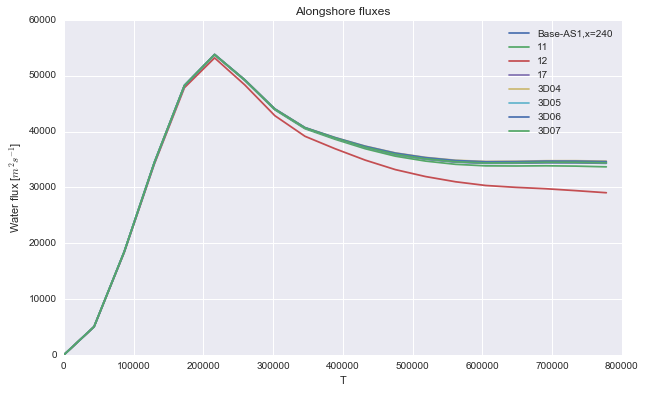

In [14]:

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

waterAS1_flux03.sum(dim='Z').plot(ax=ax, label = 'Base-AS1,x=240')
waterAS1_flux11.sum(dim='Z').plot(ax=ax, label = '11')
waterAS1_flux12.sum(dim='Z').plot(ax=ax, label = '12')
waterAS1_flux17.sum(dim='Z').plot(ax=ax, label = '17')
waterAS1_flux3D04.sum(dim='Z').plot(ax=ax, label = '3D04')
waterAS1_flux3D05.sum(dim='Z').plot(ax=ax, label = '3D05')
waterAS1_flux3D06.sum(dim='Z').plot(ax=ax, label = '3D06')
waterAS1_flux3D07.sum(dim='Z').plot(ax=ax, label = '3D07')

ax.set_ylabel('Water flux [$m^2s^{-1}$]')
ax.legend(loc=0)
ax.set_title('Alongshore fluxes')

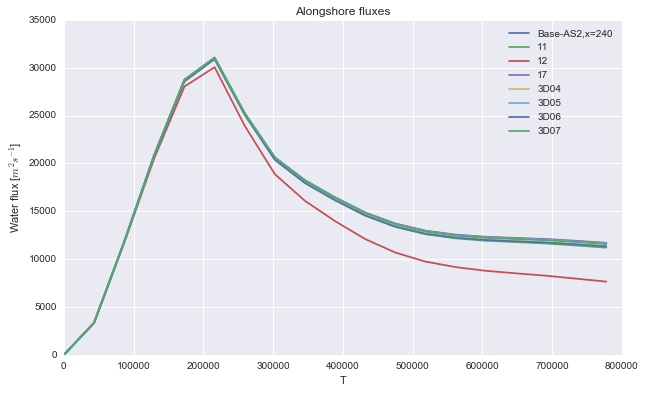

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

waterAS2_flux03.sum(dim='Z').plot(ax=ax, label = 'Base-AS2,x=240')
waterAS2_flux11.sum(dim='Z').plot(ax=ax, label = '11')
waterAS2_flux12.sum(dim='Z').plot(ax=ax, label = '12')
waterAS2_flux17.sum(dim='Z').plot(ax=ax, label = '17')
waterAS2_flux3D04.sum(dim='Z').plot(ax=ax, label = '3D04')
waterAS2_flux3D05.sum(dim='Z').plot(ax=ax, label = '3D05')
waterAS2_flux3D06.sum(dim='Z').plot(ax=ax, label = '3D06')
waterAS2_flux3D07.sum(dim='Z').plot(ax=ax, label = '3D07')

ax.set_ylabel('Water flux [$m^2s^{-1}$]')
ax.legend(loc=0)
ax.set_title('Alongshore fluxes')

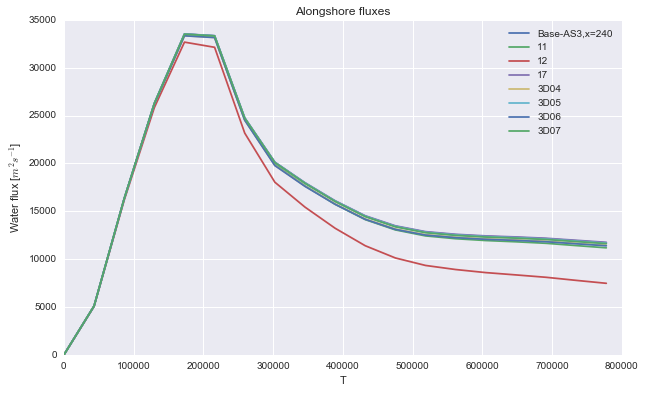

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

waterAS3_flux03.sum(dim='Z').plot(ax=ax, label = 'Base-AS3,x=240')
waterAS3_flux11.sum(dim='Z').plot(ax=ax, label = '11')
waterAS3_flux12.sum(dim='Z').plot(ax=ax, label = '12')
waterAS3_flux17.sum(dim='Z').plot(ax=ax, label = '17')
waterAS3_flux3D04.sum(dim='Z').plot(ax=ax, label = '3D04')
waterAS3_flux3D05.sum(dim='Z').plot(ax=ax, label = '3D05')
waterAS3_flux3D06.sum(dim='Z').plot(ax=ax, label = '3D06')
waterAS3_flux3D07.sum(dim='Z').plot(ax=ax, label = '3D07')

ax.set_ylabel('Water flux [$m^2s^{-1}$]')
ax.legend(loc=0)
ax.set_title('Alongshore fluxes')